# Assignment 9.1

Predicting Survival in the Titanic Data Set<br>
We will be using a decision tree to make predictions about the Titanic data set from
Kaggle. This data set provides information on the Titanic passengers and can be used to
predict whether a passenger survived or not.<br>
Loading Data and modules<br>
import numpy as np<br>
import pandas as pd<br>
import seaborn as sb<br>
import matplotlib.pyplot as plt<br>
import sklearn<br>
from pandas import Series, DataFrame<br>
from pylab import rcParams<br>
from sklearn import preprocessing<br>
from sklearn.linear_model import LogisticRegression<br>
from sklearn.cross_validation import train_test_split<br>
from sklearn import metrics<br>
from sklearn.metrics import classification_report
Url=
https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic
-train.csv<br>
titanic = pd.read_csv(url)<br>
titanic.columns =<br>
['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E
mbarked']<br>
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard),
and Fare to predict whether a passenger survived.<br>

<h2>Solution</h2>

<h3>Data Preparation</h3>

In [1]:
import numpy as np
import pandas as pd
#import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pydotplus
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing, model_selection, tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.fillna(0)

def func1(x):
    if x == 'male':
        return 1
    else:
        return 0

#We use only relevant features - drop PassengerId, Cabin, Embarked
x = pd.DataFrame()
x['Pclass'] = titanic['Pclass']
x['Sex'] = titanic['Sex'].apply(func1)
x['Age'] = titanic['Age']
x['SibSp'] = titanic['SibSp']
x['Parch'] = titanic['Parch']
x['Fare'] = titanic['Fare']
x['Survived'] = titanic['Survived']
x['Age'].fillna(np.mean(x['Age']), inplace=True)
x['SibSp'].fillna(np.mean(x['SibSp']), inplace=True)
x['Parch'].fillna(np.mean(x['Parch']), inplace=True)
x['Fare'].fillna(np.mean(x['Fare']), inplace=True)

y = x['Survived']
x = x.drop(['Survived'],axis=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33)
print(x_train.shape, x_test.shape)

c:\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(596, 6) (295, 6)


<h3>Data Visualization</h3>

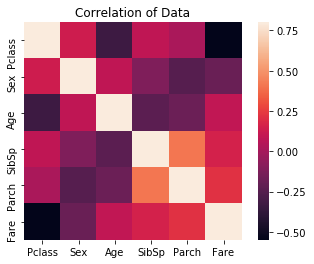

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
data_corr = x.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Correlation of Data")
plt.show()

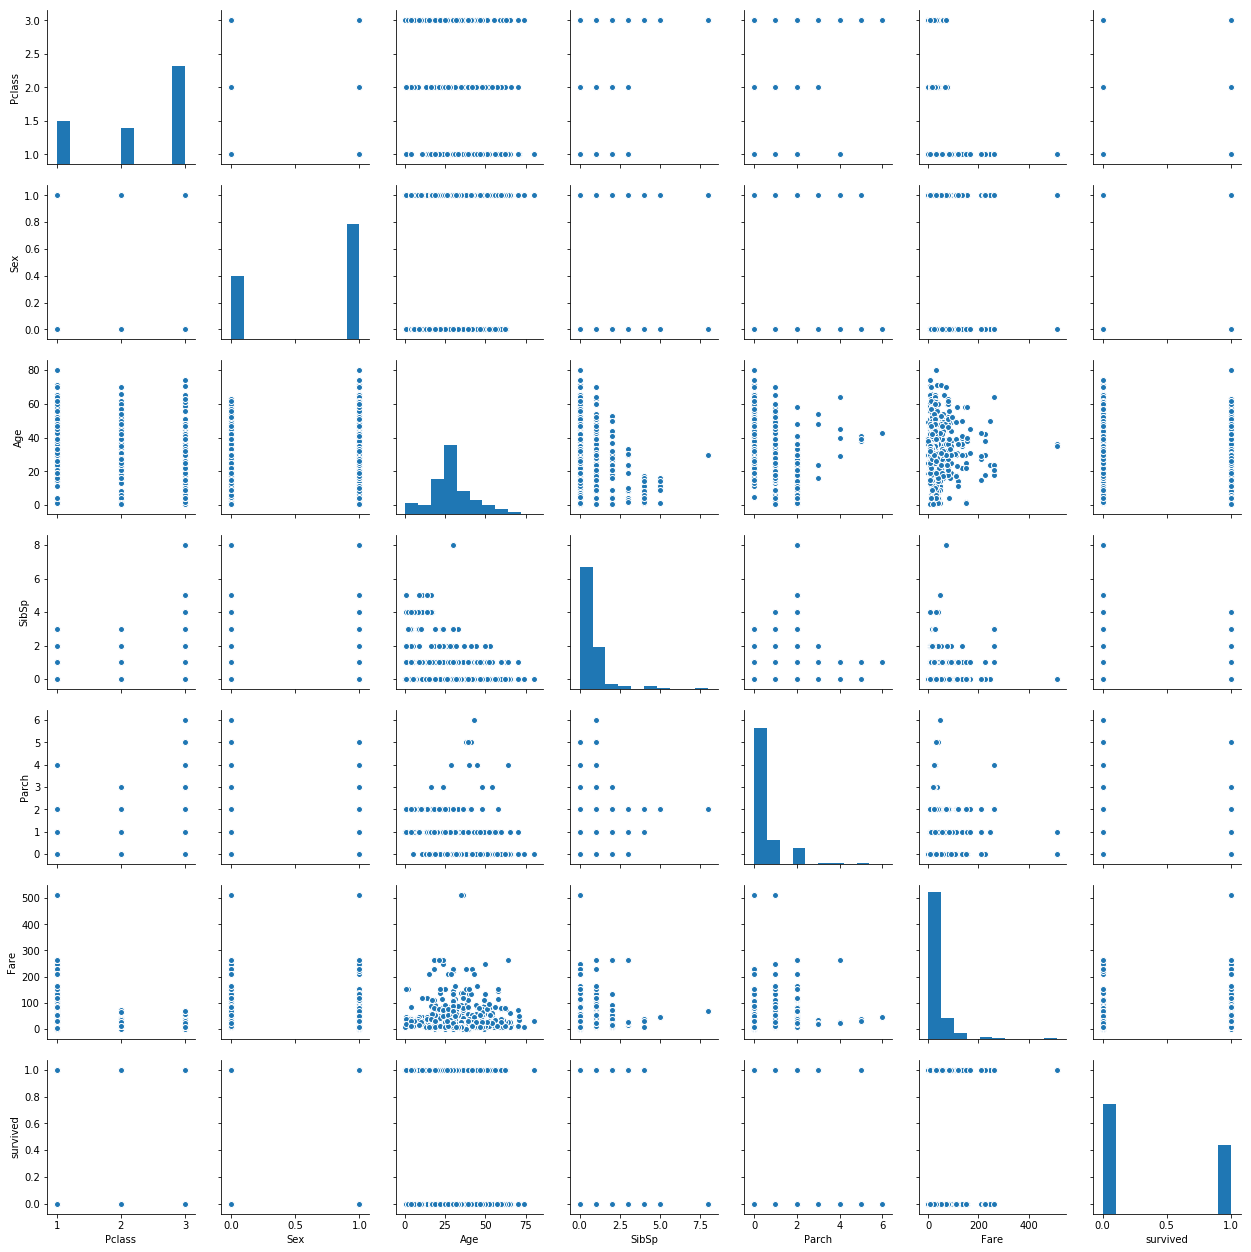

In [13]:
x['survived'] = y
pp = sns.pairplot(data=x)
plt.show()
x = x.drop(columns=['survived'], axis=1)

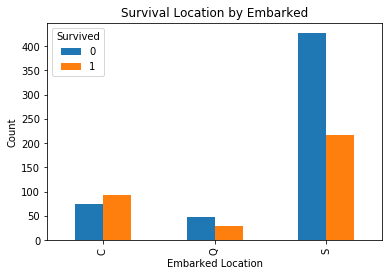

In [11]:
pd.crosstab(titanic['Embarked'], y).plot(kind='bar')
plt.title('Survival Location by Embarked')
plt.xlabel('Embarked Location')
plt.ylabel('Count')
plt.show()

There are no significant patterns of survival by embarked. Hence we can remove it as a feature

<h3>Training The Model(Decision Tree)</h3>

In [2]:
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion':['entropy'],'max_depth':[5,6,7,8,9]}]
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, scoring='accuracy')
clf.fit(x_train, y_train)

print("Best parameters for Regression are ",clf.best_params_)

dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=7)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy on Test was ",acc)
count_misclassified = (y_test != y_pred).sum()
print("The tree misclassified ",count_misclassified, "/", len(y_test))
print("The most important Feature is ",x.columns[np.argmax(dtree.feature_importances_,axis = 0)])



Best parameters for Regression are  {'criterion': 'entropy', 'max_depth': 5}
Decision Tree Accuracy on Test was  0.7830508474576271
The tree misclassified  64 / 295
The most important Feature is  Sex


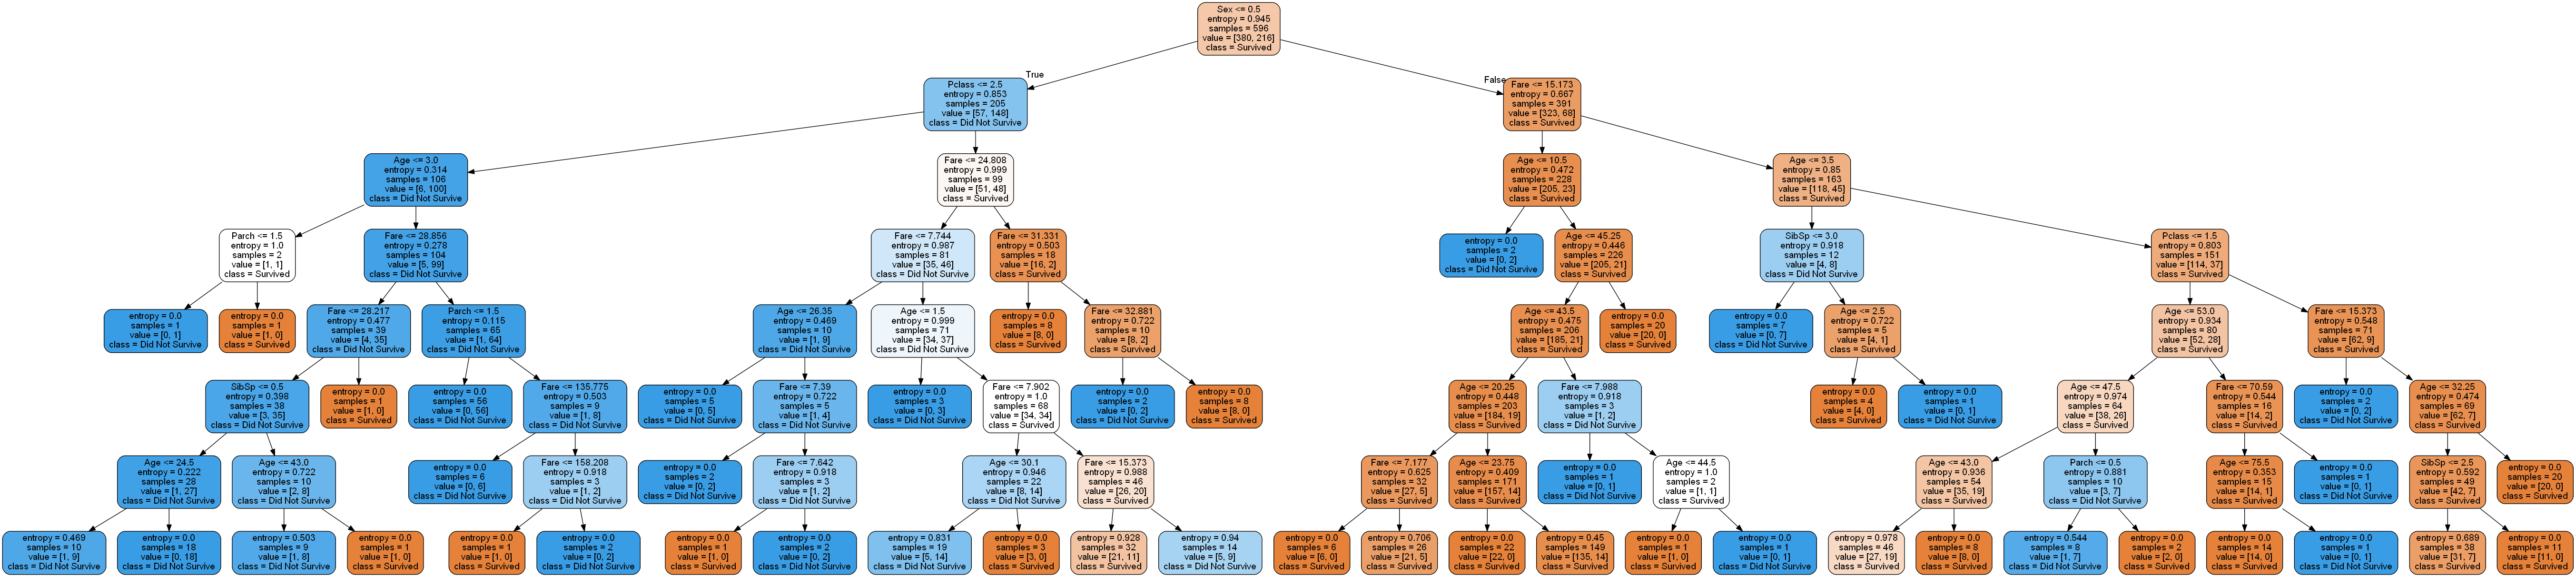

In [10]:
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,feature_names=x.columns,class_names=['Survived', 'Did Not Survive'])

graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image, display
display(Image(graph.create_png()))

In [20]:
df = pd.DataFrame()
df['columns'] = x.columns
variances = []
for col in x.columns:
    variances.append(np.var(x[col]))
df['Variances'] = variances
print(df)

  columns    Variances
0  Pclass     0.698231
1     Sex     0.228218
2     Age   168.862667
3   SibSp     1.214678
4   Parch     0.648999
5    Fare  2466.665312


In [25]:
target_names = ['Did Not Survive','Survived']
print(classification_report(y_test,y_pred,target_names=target_names))

                 precision    recall  f1-score   support

       Survived       0.61      0.69      0.65       185
Did Not Survive       0.33      0.26      0.29       110

    avg / total       0.51      0.53      0.52       295



<h3>Training the Model(Logistic Regression)</h3>

In [29]:
from sklearn.cross_validation import cross_val_score
model = LogisticRegression()
model.fit(x_train,y_train)
scores = cross_val_score(model,x_train,y_train,scoring='accuracy',cv=10)
df = pd.DataFrame()
df['feature_names'] = x.columns
df['coefficients'] = model.coef_.reshape(6,1)
print(df)
print("Mean accuracy for 10-fold cross-validation is " + str(scores.mean()))

  feature_names  coefficients
0        Pclass     -0.760111
1           Sex     -2.405859
2           Age     -0.026477
3         SibSp     -0.354655
4         Parch     -0.031300
5          Fare      0.011477
Mean accuracy for 10-fold cross-validation is 0.7987047327961471
